# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
spotify = pd.read_csv("spotify.csv")
spotify.head()

,Title,Artist,Year,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,2004,Pop,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,2000,Rock,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,2001,Hip Hop,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,2007,Metal,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,2002,Rock,106,82,58,-5,10,87,256,1,3,59


In [3]:
spotify.shape

(1994, 14)

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Year                    1994 non-null   int64 
 3   Genre                   1994 non-null   object
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   int64 
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 218.2+ KB


# Correlation of Popularity with Other Features

In [5]:
corr_matrix = spotify[['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']].corr()
corr_matrix

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Beats Per Minute (BPM),1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness (dB),0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length (Duration),0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604
Speechiness,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.027826,-0.098256,1.000000,0.111689
Popularity,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.065403,-0.087604,0.111689,1.000000


## Key Insights:

## Popularity and Danceability:

- A positive correlation of 0.144 (weak), meaning that more danceable songs tend to be slightly more popular.

## Popularity and Loudness (dB):

- A positive correlation of 0.165 (moderate), suggesting that louder songs tend to have higher popularity.

## Popularity and Energy:

- A weak positive correlation of 0.103, showing that more energetic songs are slightly more popular.

## Popularity and Valence:

- A weak positive correlation of 0.096, meaning songs with a more positive mood might be slightly more popular.

## Popularity and Speechiness:

- A weak positive correlation of 0.112, indicating that songs with more spoken word content may be slightly more popular.

## Popularity and Length (Duration):

- A weak negative correlation of -0.065, meaning that longer songs are slightly less popular on average, though the relationship is negligible.

## Popularity and Acousticness:

- A weak negative correlation of -0.088, indicating that more acoustic songs are slightly less popular.

## Popularity and Beats Per Minute (BPM):

- Almost no correlation (-0.003), suggesting that tempo does not affect popularity in this dataset.


## Correlations Between Features
## Energy and Loudness (dB):

- A strong positive correlation of 0.736, showing that louder songs tend to have higher energy.

## Valence and Danceability:

- A moderate positive correlation of 0.515, meaning happier songs are more danceable.

## Energy and Acousticness:

- A strong negative correlation of -0.665, indicating that higher-energy songs tend to be less acoustic.

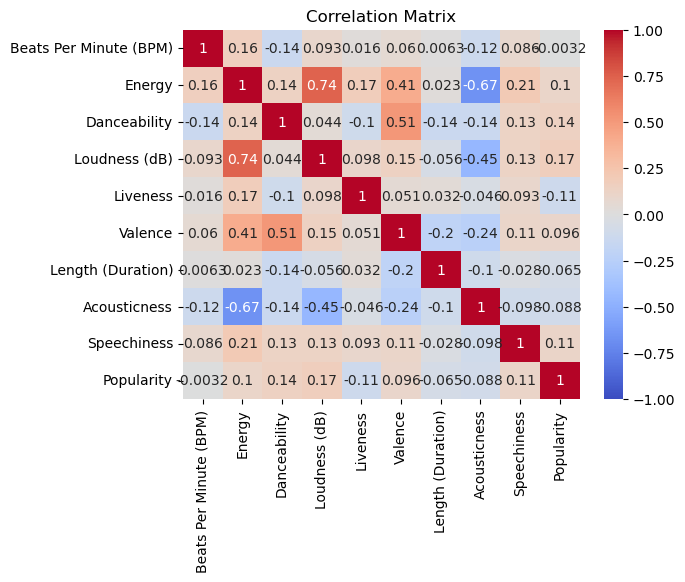

In [6]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 1. Popularity and Danceability  

Since Danceability has the strongest positive correlation with Popularity, it might be useful to explore it further.

In [7]:
danceability_bins = [0, 33, 66, 100]
danceability_labels = ['Low', 'Medium', 'High']
spotify['Danceability Category'] = pd.cut(spotify['Danceability'], bins=danceability_bins, labels=danceability_labels)


danceability_popularity = spotify.groupby('Danceability Category')['Popularity'].mean().round(2)
danceability_popularity

Danceability Category
Low       56.67
Medium    58.99
High      63.01
Name: Popularity, dtype: float64

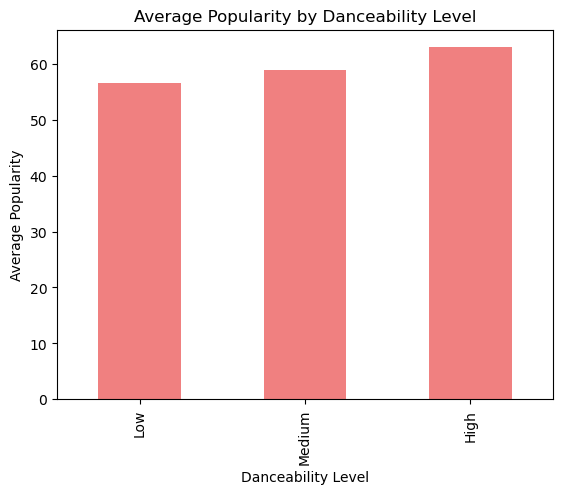

In [8]:
danceability_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Danceability Level')
plt.xlabel('Danceability Level')
plt.ylabel('Average Popularity')
plt.show()

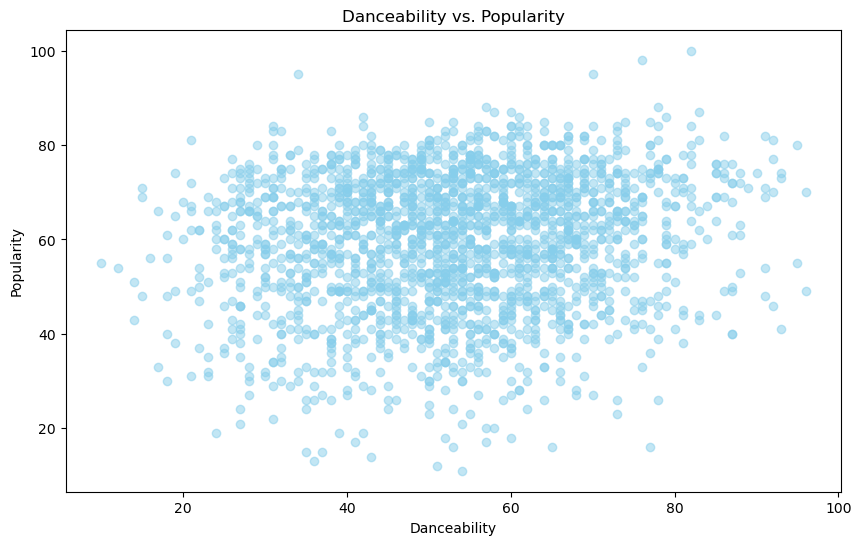

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(spotify['Danceability'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [10]:
correlation = spotify['Danceability'].corr(spotify['Popularity'])

print(f"Correlation between Danceability and Popularity: {correlation}")

Correlation between Danceability and Popularity: 0.14434428108077824


A positive correlation of 0.144 (weak), meaning that more danceable songs tend to be slightly more popular.

# 2. Popularity and Loudness (dB):

In [11]:
loudness_bins = [-30, -20, -10, 0]
loudness_labels = ['Low', 'Medium', 'High'] 

spotify['Loudness Category'] = pd.cut(spotify['Loudness (dB)'], bins=loudness_bins, labels=loudness_labels)

# Group by Loudness Category and calculate mean Popularity
loudness_popularity = spotify.groupby('Loudness Category')['Popularity'].mean().round(2)
loudness_popularity

Loudness Category
Low       53.14
Medium    57.78
High      60.72
Name: Popularity, dtype: float64

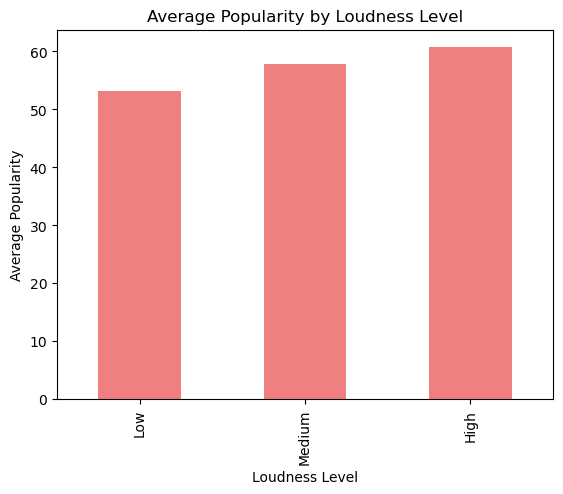

In [12]:
loudness_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Loudness Level')
plt.xlabel('Loudness Level')
plt.ylabel('Average Popularity')
plt.show()

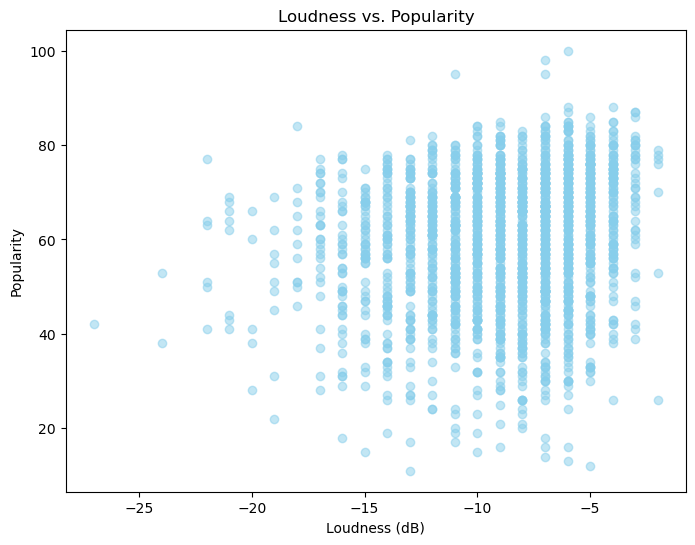

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Loudness (dB)'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Loudness vs. Popularity')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.show()

In [14]:
correlation = spotify['Loudness (dB)'].corr(spotify['Popularity'])

print(f"Correlation between Loudness (dB) and Popularity: {correlation}")

Correlation between Loudness (dB) and Popularity: 0.16552687970478874


A positive correlation of 0.165 (weak), suggesting that louder songs tend to have higher popularity.

# 3. Popularity and Energy: 
Although the correlation is weak, we can explore how songs with higher energy score in terms of popularity.

In [15]:
energy_bins = [0, 33, 66, 100]
energy_labels = ['Low', 'Medium', 'High']
spotify['Energy Category'] = pd.cut(spotify['Energy'], bins=energy_bins, labels=energy_labels)


energy_popularity = spotify.groupby('Energy Category')['Popularity'].mean().round(2)
energy_popularity

Energy Category
Low       57.23
Medium    59.14
High      60.72
Name: Popularity, dtype: float64

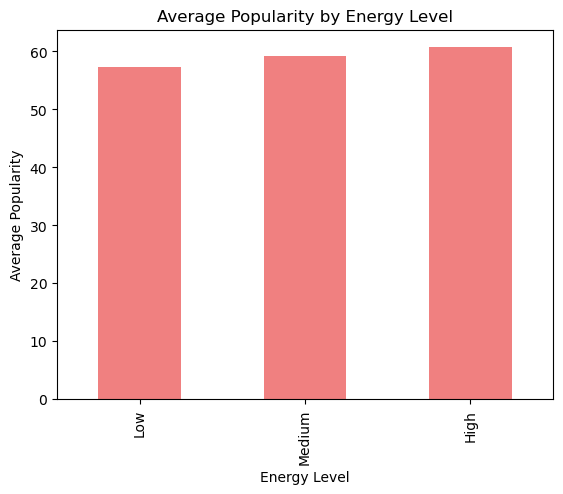

In [16]:
energy_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Average Popularity')
plt.show()

This suggests that songs with higher energy levels tend to be a bit more popular on average, although the differences aren't drastic. 
While energy doesn't have a strong correlation with popularity, there is a mild trend where higher energy songs are slightly more popular in this dataset.

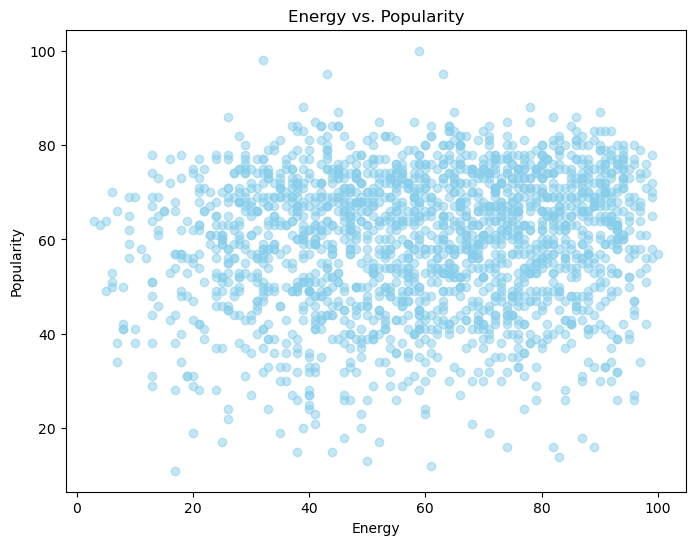

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Energy'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

In [18]:
correlation = spotify['Energy'].corr(spotify['Popularity'])

print(f"Correlation between Energy and Popularity: {correlation}")

Correlation between Energy and Popularity: 0.10339299764848615


A weak positive correlation of 0.103, showing that more energetic songs are slightly more popular.

# 4. Popularity and Valence: 

In [19]:
valence_bins = [0, 33, 66, 100]
valence_labels = ['Low', 'Medium', 'High']
spotify['Valence Category'] = pd.cut(spotify['Valence'], bins=valence_bins, labels=valence_labels)


valence_popularity = spotify.groupby('Valence Category')['Popularity'].mean().round(2)
valence_popularity

Valence Category
Low       57.69
Medium    59.70
High      61.43
Name: Popularity, dtype: float64

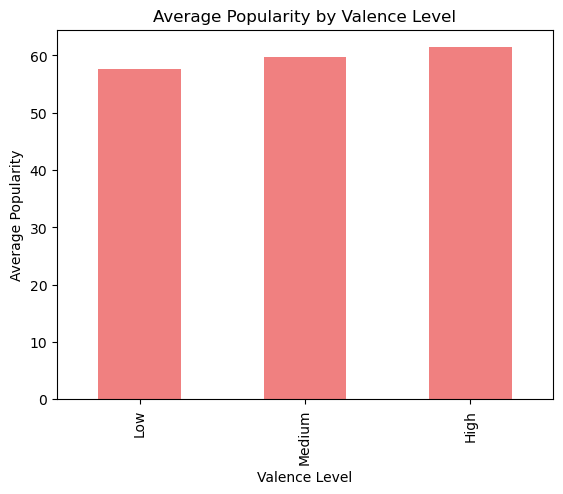

In [20]:
valence_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Valence Level')
plt.xlabel('Valence Level')
plt.ylabel('Average Popularity')
plt.show()

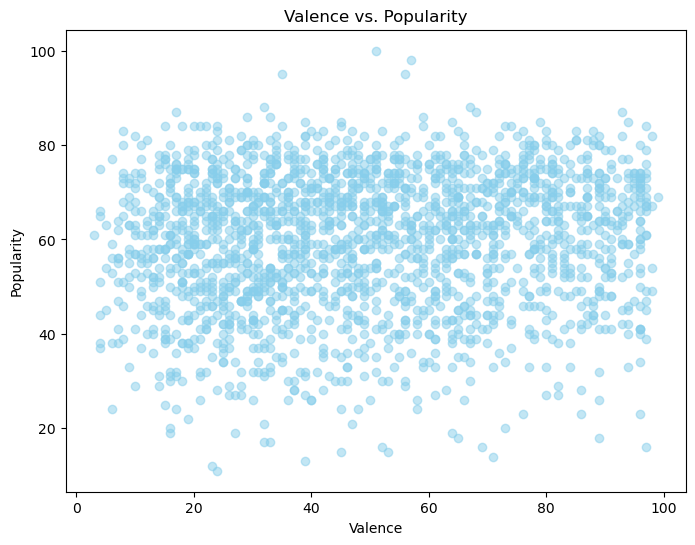

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Valence'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Valence vs. Popularity')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.show()

In [22]:
correlation = spotify['Valence'].corr(spotify['Popularity'])

print(f"Correlation between Valence and Popularity: {correlation}")

Correlation between Valence and Popularity: 0.09591082137882542


A weak positive correlation of 0.096, meaning songs with a more positive mood might be slightly more popular.

# 5. Popularity and Speechiness: 

In [23]:
spotify.Speechiness.unique()

array([ 3,  7, 17,  4,  2, 14,  8, 10,  6, 18,  9, 12,  5, 25, 26, 30, 23,
       13, 16, 24, 11, 19, 20, 15, 39, 32, 44, 31, 46, 38, 55, 22, 36, 28,
       29, 27, 41], dtype=int64)

In [24]:
speechiness_bins = [0, 20, 40, 60]
speechiness_labels = ['Low', 'Medium', 'High']
spotify['Speechiness Category'] = pd.cut(spotify['Speechiness'], bins=speechiness_bins, labels=speechiness_labels)


speechiness_popularity = spotify.groupby('Speechiness Category')['Popularity'].mean().round(2)
speechiness_popularity

Speechiness Category
Low       59.39
Medium    66.41
High      75.25
Name: Popularity, dtype: float64

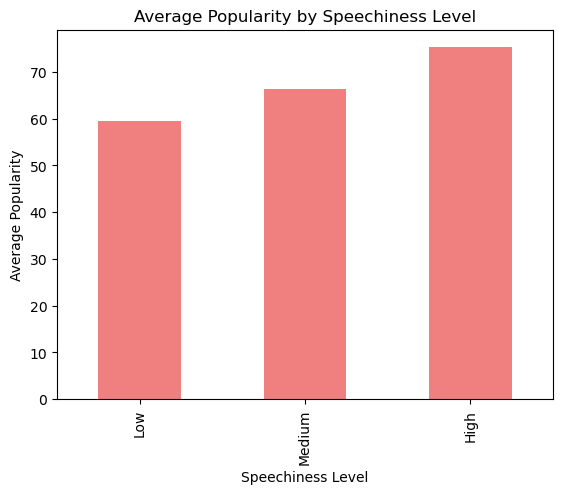

In [25]:
speechiness_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Speechiness Level')
plt.xlabel('Speechiness Level')
plt.ylabel('Average Popularity')
plt.show()

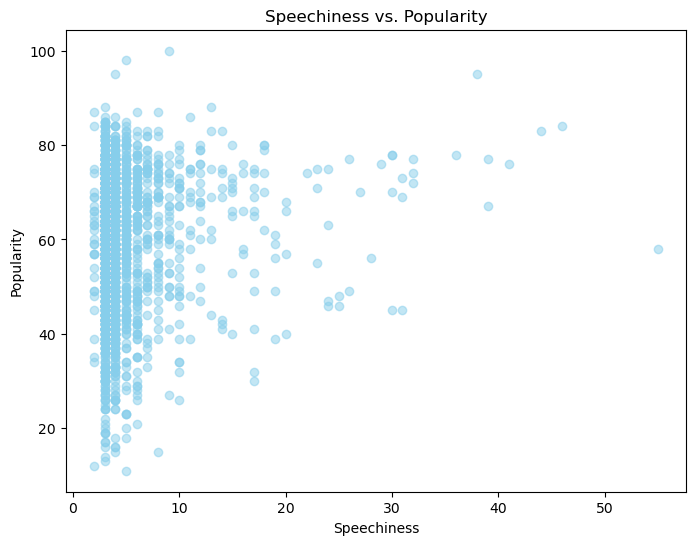

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Speechiness'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Speechiness vs. Popularity')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.show()

In [27]:
correlation = spotify['Speechiness'].corr(spotify['Popularity'])

print(f"Correlation between Speechiness and Popularity: {correlation}")

Correlation between Speechiness and Popularity: 0.11168878509815947


A weak positive correlation of 0.112, indicating that songs with more spoken word content may be slightly more popular.

# 6. Popularity and Length (Duration):

In [28]:
spotify["Length (Duration)"].unique()

array([ 201,  207,  341,  269,  256,  247,  257,  366,  223,  290,  162,
        232,  214,  639,  173,  236,  288,  276,  352,  296,  218,  176,
        197,  261,  270,  298,  259,  306,  310,  211,  186,  185,  264,
        202,  263,  266,  629,  177,  237,  278,  331,  355,  213,  234,
        216,  275,  467,  243,  219,  305,  215,  144,  195,  240,  357,
        297,  281,  273,  212,  279,  249,  229,  394,  375,  226,  210,
        258,  283,  231,  268,  403,  321,  217,  308,  206,  208,  242,
        326,  199,  225,  193,  302,  294,  238,  433,  324,  154,  245,
        248,  311,  272,  289,  253,  181,  184,  203,  280,  146,  196,
        204,  602,  353,  189,  423,  233,  135,  141,  241,  262,  346,
        319,  284,  501,  287,  170,  187,  171,  414,  252,  209,  364,
        246,  235,  161,  274,  286,  172,  404,  239,  244,  291,  251,
        260,  190,  122,  336,  228,  222,  267,  220,  139,  227,  277,
        125,  335,  386,  376,  150,  174,  317,  3

In [29]:
spotify["Length (Duration)"].min()

93

In [30]:
spotify["Length (Duration)"].max()

1412

In [31]:
length_bins = [90, 400, 900, 1420]
length_labels = ['Low', 'Medium', 'High']
spotify['Length Category'] = pd.cut(spotify['Length (Duration)'], bins=length_bins, labels=length_labels)


length_popularity = spotify.groupby('Length Category')['Popularity'].mean().round(2)
length_popularity

Length Category
Low       59.76
Medium    56.10
High      46.00
Name: Popularity, dtype: float64

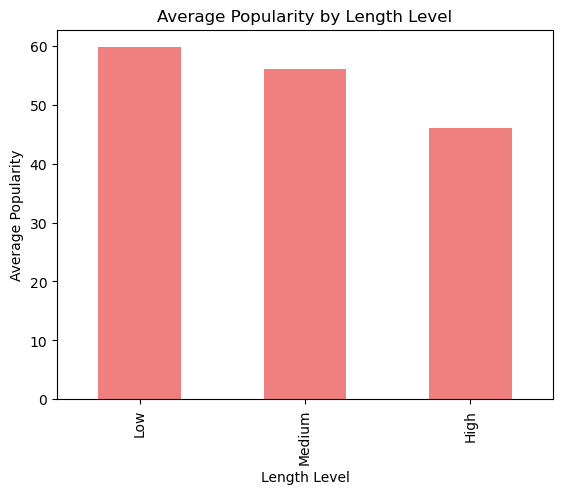

In [32]:
length_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Length Level')
plt.xlabel('Length Level')
plt.ylabel('Average Popularity')
plt.show()

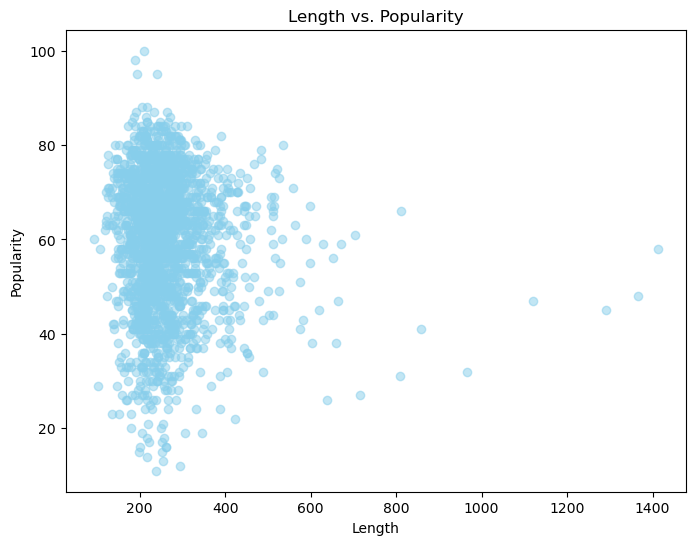

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Length (Duration)'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Length vs. Popularity')
plt.xlabel('Length')
plt.ylabel('Popularity')
plt.show()

In [34]:
correlation = spotify['Length (Duration)'].corr(spotify['Popularity'])

print(f"Correlation between Duration and Popularity: {correlation}")

Correlation between Duration and Popularity: -0.06540273971657688


A weak negative correlation of -0.065, meaning that longer songs are slightly less popular on average, though the relationship is negligible.

# Popularity of Long Songs

To explore whether longer songs tend to be more or less popular, we group songs into categories based on their duration and calculate the average popularity for each category.

For example:

- Short songs (under 3 minutes, < 180 seconds)
- Medium-length songs (3–5 minutes, 180–300 seconds)
- Long songs (over 5 minutes, > 300 seconds)

In [35]:
conditions = [
    (spotify['Length (Duration)'] < 180),  # Short
    (spotify['Length (Duration)'] >= 180) & (spotify['Length (Duration)'] <= 300),  # Medium
    (spotify['Length (Duration)'] > 300)  # Long
]

categories = ['Short', 'Medium', 'Long']
spotify['Duration Category'] = pd.cut(spotify['Length (Duration)'], bins=[0, 180, 300, float('inf')], labels=categories)


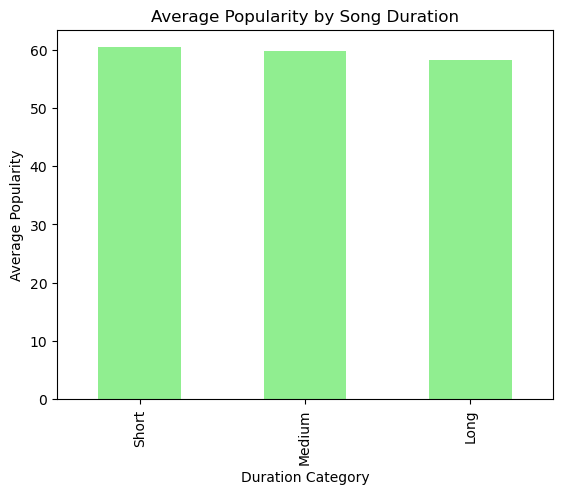

In [36]:
popularity_by_duration = spotify.groupby('Duration Category')['Popularity'].mean()


popularity_by_duration.plot(kind='bar', color='lightgreen')
plt.title('Average Popularity by Song Duration')
plt.xlabel('Duration Category')
plt.ylabel('Average Popularity')
plt.show()

# Distribution of Popularity within Each Duration Category

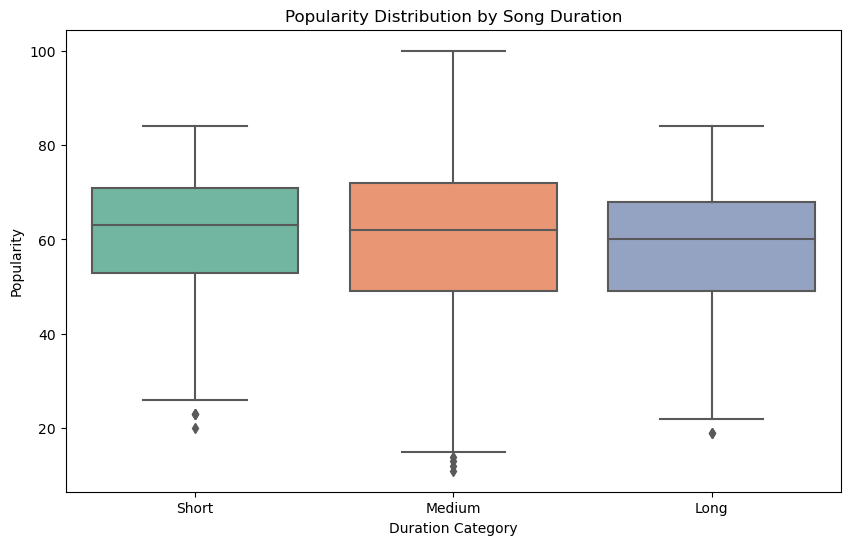

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Duration Category', y='Popularity', data=spotify, palette='Set2')
plt.title('Popularity Distribution by Song Duration')
plt.xlabel('Duration Category')
plt.ylabel('Popularity')
plt.show()

# 7. Popularity and Acousticness:

In [38]:
spotify["Acousticness"].unique()

array([94, 17,  2,  0,  1,  6, 88, 18, 84, 57, 16,  5, 48,  7, 92,  8, 73,
       32, 31, 49, 34, 91,  3, 11,  4, 72, 95, 78, 42, 27, 22, 35, 13, 66,
       21, 28, 89, 29, 83, 24, 82, 38,  9, 33, 12, 47, 67, 15, 79, 54, 74,
       30, 53, 76, 45, 14, 44, 39, 68, 52, 46, 86, 19, 64, 10, 87, 99, 43,
       77, 51, 85, 41, 90, 58, 26, 98, 60, 96, 36, 63, 93, 25, 65, 23, 75,
       50, 61, 81, 56, 97, 20, 59, 80, 69, 40, 70, 37, 55, 62, 71],
      dtype=int64)

In [39]:
acousticness_bins = [0, 33, 66, 100]
acousticness_labels = ['Low', 'Medium', 'High']
spotify['Acousticness Category'] = pd.cut(spotify['Acousticness'], bins=energy_bins, labels=energy_labels)


acousticness_popularity = spotify.groupby('Acousticness Category')['Popularity'].mean().round(2)
acousticness_popularity

Acousticness Category
Low       60.36
Medium    58.45
High      57.19
Name: Popularity, dtype: float64

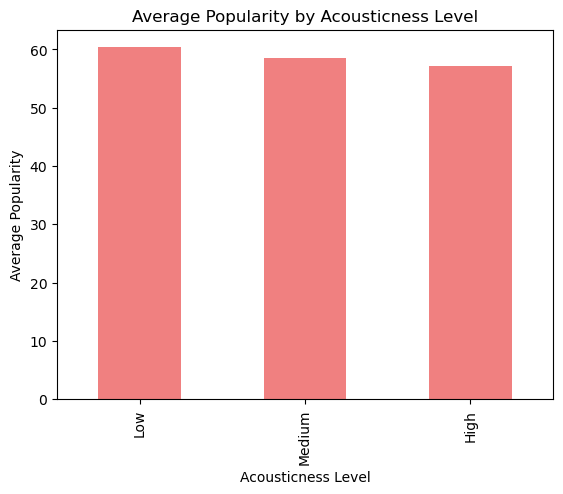

In [40]:
acousticness_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Acousticness Level')
plt.xlabel('Acousticness Level')
plt.ylabel('Average Popularity')
plt.show()

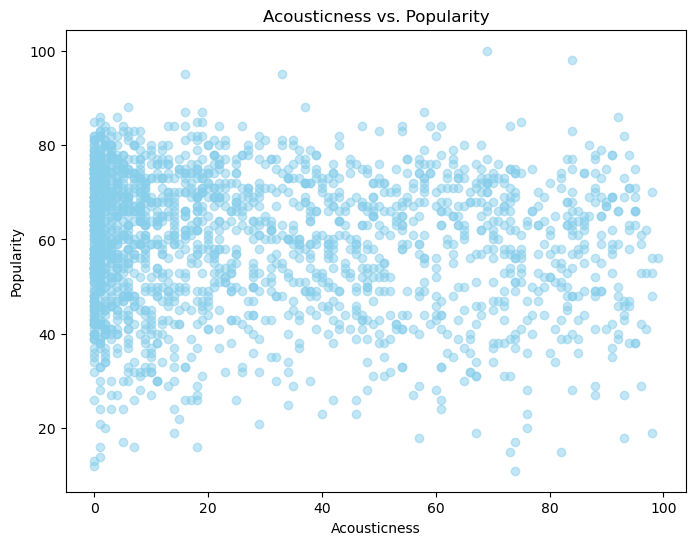

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Acousticness'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('Acousticness vs. Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.show()

In [42]:
correlation = spotify['Acousticness'].corr(spotify['Popularity'])

print(f"Correlation between Acousticness and Popularity: {correlation}")

Correlation between Acousticness and Popularity: -0.08760427211616201


A weak negative correlation of -0.088, indicating that more acoustic songs are slightly less popular.

# 8. Popularity and Beats Per Minute (BPM):

In [43]:
spotify["Beats Per Minute (BPM)"].unique()

array([157, 135, 168, 173, 106,  99, 102, 137, 148, 112, 109, 124, 117,
       133, 123, 127,  87,  74, 138, 142,  96, 130, 154, 146, 181,  80,
        88, 122, 119, 156, 152,  72, 118, 105, 186, 100, 115,  75, 131,
        76, 108, 194,  90, 149,  92, 132,  86, 166, 176, 103, 136,  81,
        77, 171, 183, 178, 139, 101, 110, 104, 159, 160,  83,  79, 120,
       145, 128,  61, 162,  93, 107, 177,  94,  68, 129, 193,  85, 125,
       126, 165,  58,  91,  89, 141, 121,  97,  98, 190, 164, 114, 170,
       147, 180, 116, 144,  70, 174,  95, 179, 113, 169, 111, 175, 184,
        73, 150, 134,  67, 143, 205,  78, 140, 151,  82, 153, 182, 172,
       199, 155,  84,  71, 167, 161,  49, 189, 158, 163,  69, 198, 197,
       203,  60,  37,  64, 200, 188, 204, 196, 191, 185, 206,  54,  66,
        65,  63], dtype=int64)

In [44]:
spotify["Beats Per Minute (BPM)"].min()

37

In [45]:
spotify["Beats Per Minute (BPM)"].max()

206

In [46]:
bpm_bins = [30, 90, 150, 210]
bpm_labels = ['Low', 'Medium', 'High']
spotify['BPM Category'] = pd.cut(spotify['Beats Per Minute (BPM)'], bins=bpm_bins, labels=bpm_labels)


bpm_popularity = spotify.groupby('BPM Category')['Popularity'].mean().round(2)
bpm_popularity

BPM Category
Low       58.79
Medium    59.75
High      59.20
Name: Popularity, dtype: float64

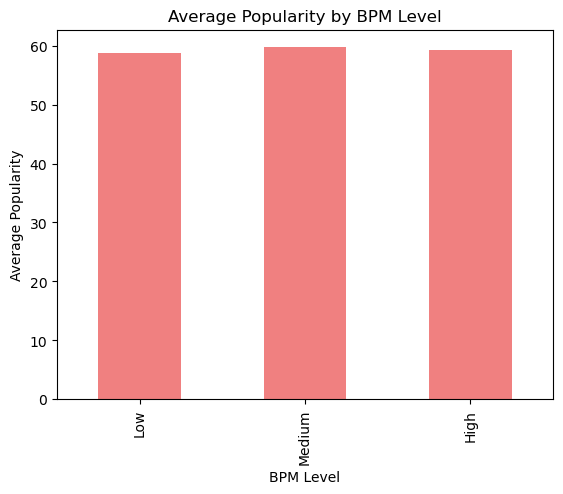

In [47]:
bpm_popularity.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by BPM Level')
plt.xlabel('BPM Level')
plt.ylabel('Average Popularity')
plt.show()

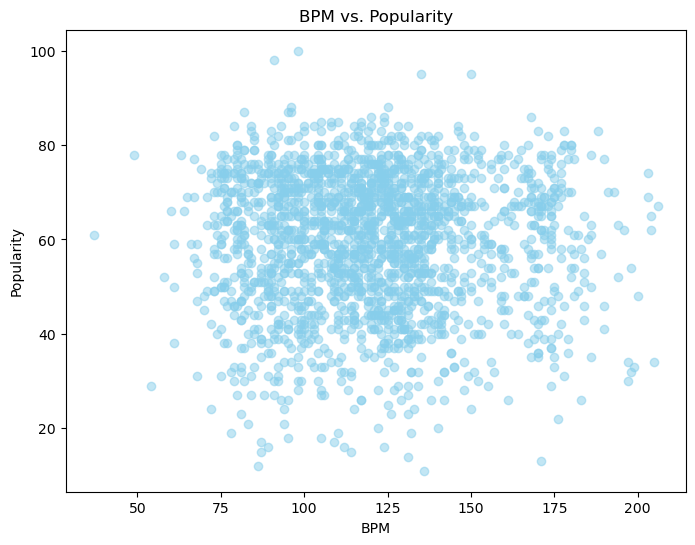

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['Beats Per Minute (BPM)'], spotify['Popularity'], alpha=0.5, color='skyblue')
plt.title('BPM vs. Popularity')
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.show()

In [49]:
correlation = spotify['Beats Per Minute (BPM)'].corr(spotify['Popularity'])

print(f"Correlation between Beats Per Minute and Popularity: {correlation}")

Correlation between Beats Per Minute and Popularity: -0.0031813544798307046


Almost no correlation (-0.003), suggesting that tempo does not affect popularity in this dataset.

# Correlations Between Features

# Energy and Loudness (dB):

In [50]:
correlation = spotify['Energy'].corr(spotify['Loudness (dB)'])

print(f"Correlation between Energy and Loudness: {correlation}")

Correlation between Energy and Loudness: 0.7357108817659004


A strong positive correlation of 0.736, showing that louder songs tend to have higher energy.

# Valence and Danceability:

In [51]:
correlation = spotify['Valence'].corr(spotify['Danceability'])

print(f"Correlation between Valence and Danceability: {correlation}")

Correlation between Valence and Danceability: 0.5145637629279765


A moderate positive correlation of 0.515, meaning happier songs are more danceable.

# Energy and Acousticness:

In [52]:
correlation = spotify['Energy'].corr(spotify['Acousticness'])

print(f"Correlation between Energy and Acousticness: {correlation}")

Correlation between Energy and Acousticness: -0.6651563552906689


A strong negative correlation of -0.665, indicating that higher-energy songs tend to be less acoustic.

In [53]:
# Group songs by combined Energy and Danceability categories and calculate average popularity
popularity_by_combined = spotify.groupby(['Energy Category', 'Danceability Category'])['Popularity'].mean().round(2).unstack()
popularity_by_combined

Danceability Category,Low,Medium,High
Energy Category,,,
Low,55.48,57.19,60.34
Medium,55.54,58.71,62.35
High,59.12,59.86,64.23


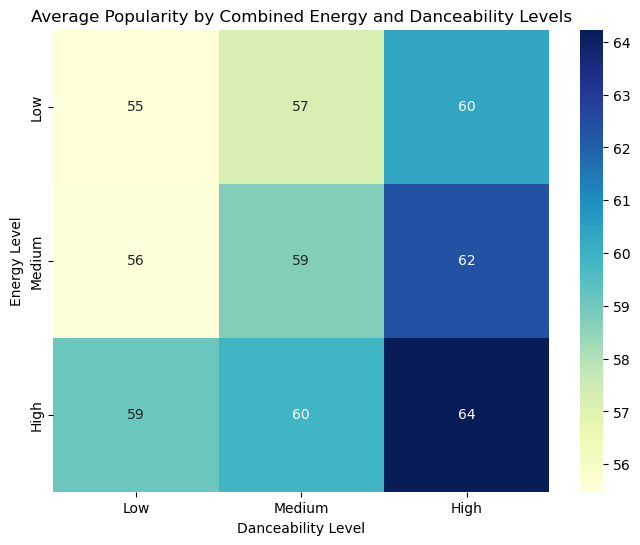

In [54]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(popularity_by_combined, annot=True, cmap="YlGnBu")
plt.title("Average Popularity by Combined Energy and Danceability Levels")
plt.xlabel("Danceability Level")
plt.ylabel("Energy Level")
plt.show()